In [2]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import textwrap

## multiple choice

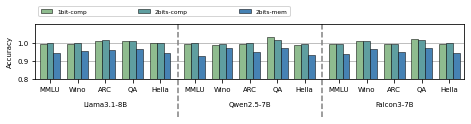

In [26]:
#figure3 a
data = pd.read_excel('data/multiple-choice.xlsx')
data = data.iloc[:,1:]
data = data.rename(columns={'Unnamed: 1': 'Models'})

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(7,1))

total_bars = len(data)
bar_width = 0.1
positions = []
current_pos = 0

for i in range(len(data)):
    for j in range(3):
        positions.append(current_pos + j * bar_width)
    
    if i < len(data) - 1:  
        if i == 4 or i ==9:  
            current_pos += 5 * bar_width
        else: 
            current_pos += 4 * bar_width
positions = np.array(positions).reshape(len(data), 3)
# Create bars with different colors
# plt.bar(r1, data['w/o protection'], width=bar_width, label='FI', color='#474762', hatch = 'o*-+', zorder=5)  # Green
# # plt.bar(r2, data['ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
# plt.bar(r2, data['Ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
# plt.bar(r3, data['MaxiMals'], width=bar_width, label='global cli', color='#953738', hatch = '*',zorder=5)  # Red
# plt.bar(r4, data['Global Clipper'], width=bar_width, label='maximal', color='#345F71',  hatch='\/', zorder=5)  # Yellow
# plt.bar(r5, data['DRY'], width=bar_width, label='pretrain', color='#FFC474', hatch='/', zorder=5)  # Red
# # plt.bar(r6, data['ours'], width=bar_width, label='ours', color='#8B522F', hatch='/\\/\\', zorder=5)  # Yellow
# plt.bar(r6, data['ZERO-DRY'], width=bar_width, label='ours', color='#8B522F', hatch='o', zorder=5)  # Yellow
# plt.bar(positions[:, 0], data['w/o protection'], width=bar_width, label='FI', edgecolor='#493131', linewidth=0.5, color='whitesmoke', hatch = '/', zorder=5)  # Green
# plt.bar(positions[:, 1], data['Ranger'], width=bar_width, label='ranger', edgecolor='#493131', linewidth=0.5, color='darkorange', hatch = '\\\\', zorder=5)  # Blue
# plt.bar(positions[:, 2], data['MaxiMals'], width=bar_width, label='global cli', edgecolor='#493131', linewidth=0.5, color='lightsalmon', hatch = '+',zorder=5)  # Red
# plt.bar(positions[:, 3], data['Global Clipper'], width=bar_width, label='maximal', edgecolor='#493131', linewidth=0.5, color='peachpuff', hatch = 'x', zorder=5)  # Yellow
# plt.bar(positions[:, 4], data['ZERO-DRY + offline profiling'], width=bar_width, label='pretrain', edgecolor='#493131', linewidth=0.5, color='#6cb3da', hatch = '.', zorder=5)  # Red
# plt.bar(positions[:, 5], data['ZERO-DRY'],width=bar_width, label='ours', edgecolor='#493131', linewidth=0.5, color='#3b5da3', zorder=5)  # Yellow
plt.bar(positions[:, 0], data['2bits-comp'], width=bar_width, label='2bits-weights', edgecolor='black', linewidth=0.5, color='darkseagreen',  zorder=5)  # Red
plt.bar(positions[:, 1], data['1bit-comp'], width=bar_width, label='2bits-neurons', edgecolor='black', linewidth=0.5, color='cadetblue', zorder=5)  # Blue
plt.bar(positions[:, 2], data['2bits-mem'], width=bar_width, label='1bit-neurons', edgecolor='black', linewidth=0.5, color='steelblue', zorder=5)
#plt.bar(positions[:, 2], data['GSM8K'], width=bar_width, label='global cli', edgecolor='black', linewidth=0.5, color='#f5f8fa',  zorder=5)  # Red
# 'whitesmoke', 'darkorange', 'lightsalmon', 'peachpuff', '#6cb3da', '#3b5da3'
# labels = ['squad_v2', 'xtreme', 'gsm8k']
# positions = [2, 5, 8] 
# plt.xticks(positions, labels)
group_centers = positions.mean(axis=1)
plt.subplots_adjust(left=0.05, right=0.9)
# plt.legend(data.columns[1:], loc='upper right', fontsize='small', ncol=2)
# plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.yticks([0.8, 0.9, 1])
plt.ylim(0.8, 1.1)
plt.text(group_centers[2], 0.65, 'Llama3.1-8B', ha='center')  
plt.text(group_centers[7], 0.65, 'Qwen2.5-7B', ha='center')
plt.text(group_centers[12], 0.65, 'Falcon3-7B', ha='center')
labels = data.Models.to_list()
labels_wrapped = ['\n'.join(label.split(' ')[:3]) for label in labels]
plt.xticks(group_centers, labels_wrapped)
# plt.xticks(range(len(data.Models)), data.Models, rotation=45, ha='center')
# plt.legend(data.columns[1:], bbox_to_anchor=(1, 1), fontsize='small', ncol=1)
plt.legend(data.columns[2:], loc='lower left', bbox_to_anchor=(0, 1.1, 0.6, 0.2), mode='expand', fontsize='small', ncol=4)
shift = -0.245
target_idx1 = group_centers[5]
target_idx2 = group_centers[10]
plt.gca().margins(x=0.01)
plt.axvline(x=target_idx1 + shift, color='gray', linestyle='--', ymin=-0.7, ymax=1, clip_on=False)
plt.axvline(x=target_idx2 + shift, color='gray', linestyle='--', ymin=-0.7, ymax=1, clip_on=False)
plt.grid(True,axis='y')
plt.savefig('figs/multiple-choice.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

## gsm8k

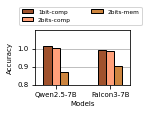

In [ ]:
#figure3 b
data = pd.read_excel('data/gsm8k.xlsx')

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(1.7,1))

data.columns=['model', 'baseline', '1bit-comp', '2bits-comp', '2bits-mem']

bar_width = 0.15
num_bars = 3  
group_width = bar_width * num_bars  
group_centers = np.arange(len(data))

# Calculate position of each bar to center them
r1 = group_centers - group_width/2 + bar_width/2  # First bar
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]



plt.bar(r1, data['1bit-comp'], width=bar_width, edgecolor='black', linewidth=1, color='sienna', zorder=5)  # Yellow
plt.bar(r2, data['2bits-comp'], width=bar_width, edgecolor='black', linewidth=1, color='lightsalmon', zorder=5)  # Yellow
plt.bar(r3, data['2bits-mem'], width=bar_width, edgecolor='black', linewidth=1, color='peru', zorder=5)  # Yellow

plt.xlabel('Models', labelpad=3)
plt.xticks(range(len(data)), data.model, ha='center')
plt.ylabel('Accuracy')
plt.yticks([0.8, 0.9, 1])
plt.ylim(0.8, 1.1)


plt.legend(data.columns[2:], loc='lower left', bbox_to_anchor=(-0.2, 1.05, 1.35, 0.2), mode='expand', fontsize='small', ncol=2)
plt.gca().margins(x=0.1)

plt.grid(True,axis='y')
plt.savefig('figs/gsm8k.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

## xmt

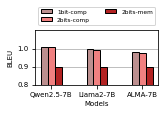

In [ ]:
#figure3 c up
data = pd.read_excel('data/xmt-bleu.xlsx')

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(2.2,1))

data.columns=['model', 'baseline', '1bit-comp', '2bits-comp', '2bits-mem']

bar_width = 0.15
num_bars = 3  
group_width = bar_width * num_bars  
group_centers = np.arange(len(data))

# Calculate position of each bar to center them
r1 = group_centers - group_width/2 + bar_width/2  # First bar
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]



plt.bar(r1, data['1bit-comp'], width=bar_width, edgecolor='black', linewidth=1, color='rosybrown', zorder=5)  # Yellow
plt.bar(r2, data['2bits-comp'], width=bar_width, edgecolor='black', linewidth=1, color='lightcoral', zorder=5)  # Yellow
plt.bar(r3, data['2bits-mem'], width=bar_width, edgecolor='black', linewidth=1, color='firebrick', zorder=5)  # Yellow

plt.xlabel('Models', labelpad=3)
plt.xticks(range(len(data)), data.model, ha='center')
plt.ylabel('BLEU')
plt.yticks([0.8, 0.9, 1])
plt.ylim(0.8, 1.1)


plt.legend(data.columns[2:], loc='lower left', bbox_to_anchor=(0, 1.05, 1, 0.2), mode='expand', fontsize='small', ncol=2)
plt.gca().margins(x=0.05)

plt.grid(True,axis='y')
plt.savefig('figs/xmt-bleu.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

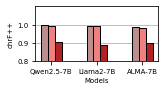

In [ ]:
#figure3 c bottom
data = pd.read_excel('data/xmt-chrf.xlsx')

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(2.2,1))

data.columns=['model', 'baseline', '1bit-comp', '2bits-comp', '2bits-mem']

bar_width = 0.15
num_bars = 3  
group_width = bar_width * num_bars  
group_centers = np.arange(len(data))

# Calculate position of each bar to center them
r1 = group_centers - group_width/2 + bar_width/2  # First bar
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]



plt.bar(r1, data['1bit-comp'], width=bar_width, edgecolor='black', linewidth=1, color='rosybrown', zorder=5)  # Yellow
plt.bar(r2, data['2bits-comp'], width=bar_width, edgecolor='black', linewidth=1, color='lightcoral', zorder=5)  # Yellow
plt.bar(r3, data['2bits-mem'], width=bar_width, edgecolor='black', linewidth=1, color='firebrick', zorder=5)  # Yellow

plt.xlabel('Models', labelpad=3)
plt.xticks(range(len(data)), data.model, ha='center')
plt.ylabel('chrF++')
plt.yticks([0.8, 0.9, 1])
plt.ylim(0.8, 1.1)


#plt.legend(data.columns[2:], loc='lower left', bbox_to_anchor=(-0.1, 1.05, 1.2, 0.2), mode='expand', fontsize='small', ncol=2)
plt.gca().margins(x=0.05)

plt.grid(True,axis='y')
plt.savefig('figs/xmt-chrf.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

## xlsum

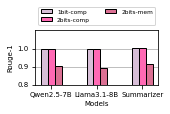

In [ ]:
#figure3 d up
data = pd.read_excel('data/xlsum-r1.xlsx')

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(2.2,1))

data.columns=['model', 'baseline', '1bit-comp', '2bits-comp', '2bits-mem']

bar_width = 0.15
num_bars = 3  
group_width = bar_width * num_bars  
group_centers = np.arange(len(data))

# Calculate position of each bar to center them
r1 = group_centers - group_width/2 + bar_width/2  # First bar
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]


plt.bar(r1, data['1bit-comp'], width=bar_width, edgecolor='black', linewidth=1, color='thistle', zorder=5)  # Yellow
plt.bar(r2, data['2bits-comp'], width=bar_width, edgecolor='black', linewidth=1, color='hotpink', zorder=5)  # Yellow
plt.bar(r3, data['2bits-mem'], width=bar_width, edgecolor='black', linewidth=1, color='palevioletred', zorder=5)  # Yellow

plt.xlabel('Models', labelpad=3)
plt.xticks(range(len(data)), data.model, ha='center')
plt.ylabel('Rouge-1')
plt.yticks([0.8, 0.9, 1])
plt.ylim(0.8, 1.1)


plt.legend(data.columns[2:], loc='lower left', bbox_to_anchor=(0, 1.05, 1, 0.2), mode='expand', fontsize='small', ncol=2)
plt.gca().margins(x=0.05)

plt.grid(True,axis='y')
plt.savefig('figs/xlsum-r1.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

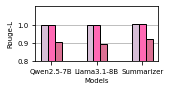

In [ ]:
#figure3 d bottom
data = pd.read_excel('data/xlsum-rl.xlsx')

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(2.2,1))

data.columns=['model', 'baseline', '1bit-comp', '2bits-comp', '2bits-mem']

bar_width = 0.15
num_bars = 3  
group_width = bar_width * num_bars  
group_centers = np.arange(len(data))

# Calculate position of each bar to center them
r1 = group_centers - group_width/2 + bar_width/2  # First bar   
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]


plt.bar(r1, data['1bit-comp'], width=bar_width, edgecolor='black', linewidth=1, color='thistle', zorder=5)  # Yellow
plt.bar(r2, data['2bits-comp'], width=bar_width, edgecolor='black', linewidth=1, color='hotpink', zorder=5)  # Yellow
plt.bar(r3, data['2bits-mem'], width=bar_width, edgecolor='black', linewidth=1, color='palevioletred', zorder=5)  # Yellow

plt.xlabel('Models', labelpad=3)
plt.xticks(range(len(data)), data.model, ha='center')
plt.ylabel('Rouge-L')
plt.yticks([0.8, 0.9, 1])
plt.ylim(0.8, 1.1)


#plt.legend(data.columns[2:], loc='lower left', bbox_to_anchor=(-0.1, 1.05, 1.2, 0.2), mode='expand', fontsize='small', ncol=2)
plt.gca().margins(x=0.05)

plt.grid(True,axis='y')
plt.savefig('figs/xlsum-rl.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

## squad

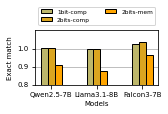

In [ ]:
#figure3 e up
data = pd.read_excel('data/sq-exact.xlsx')

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(2.2,1))

data.columns=['model', 'baseline', '1bit-comp', '2bits-comp', '2bits-mem']

bar_width = 0.15
num_bars = 3  
group_width = bar_width * num_bars  
group_centers = np.arange(len(data))

# Calculate position of each bar to center them
r1 = group_centers - group_width/2 + bar_width/2  # First bar   
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]


plt.bar(r1, data['1bit-comp'], width=bar_width, edgecolor='black', linewidth=1, color='darkkhaki', zorder=5)  # Yellow
plt.bar(r2, data['2bits-comp'], width=bar_width, edgecolor='black', linewidth=1, color='goldenrod', zorder=5)  # Yellow
plt.bar(r3, data['2bits-mem'], width=bar_width, edgecolor='black', linewidth=1, color='orange', zorder=5)  # Yellow

plt.xlabel('Models', labelpad=3)
plt.xticks(range(len(data)), data.model, ha='center')
plt.ylabel('Exact match')
plt.yticks([0.8, 0.9, 1])
plt.ylim(0.8, 1.1)


plt.legend(data.columns[2:], loc='lower left', bbox_to_anchor=(0, 1.05, 1, 0.2), mode='expand', fontsize='small', ncol=2)
plt.gca().margins(x=0.05)

plt.grid(True,axis='y')
plt.savefig('figs/sq-exact.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

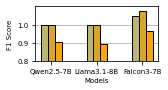

In [ ]:
#figure3 e bottom
data = pd.read_excel('data/sq-f1.xlsx')

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(2.2,1))

data.columns=['model', 'baseline', '1bit-comp', '2bits-comp', '2bits-mem']

bar_width = 0.15
num_bars = 3  
group_width = bar_width * num_bars  
group_centers = np.arange(len(data))

# Calculate position of each bar to center them
r1 = group_centers - group_width/2 + bar_width/2  # First bar   
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]


plt.bar(r1, data['1bit-comp'], width=bar_width, edgecolor='black', linewidth=1, color='darkkhaki', zorder=5)  # Yellow
plt.bar(r2, data['2bits-comp'], width=bar_width, edgecolor='black', linewidth=1, color='goldenrod', zorder=5)  # Yellow
plt.bar(r3, data['2bits-mem'], width=bar_width, edgecolor='black', linewidth=1, color='orange', zorder=5)  # Yellow

plt.xlabel('Models', labelpad=3)
plt.xticks(range(len(data)), data.model, ha='center')
plt.ylabel('F1 Score')
plt.yticks([0.8, 0.9, 1])
plt.ylim(0.8, 1.1)


#plt.legend(data.columns[2:], loc='lower left', bbox_to_anchor=(-0.1, 1.05, 1.2, 0.2), mode='expand', fontsize='small', ncol=2)
plt.gca().margins(x=0.05)

plt.grid(True,axis='y')
plt.savefig('figs/sq-f1.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

## avarage faultmodel

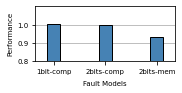

In [42]:
#figure4
data = pd.read_excel('data/average-faultmodel.xlsx')
data.columns=['a', 'b']

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(2.5, 1))

bar_width = 0.25
r1 = np.arange(len(data))

plt.bar(r1, data.b, width=bar_width, edgecolor='black', linewidth=1, color='#4682B4', zorder=5)  # Yellow

plt.xlabel('Fault Models', labelpad=6)
# labels = data.methods.to_list()
# labels_wrapped = ['_\n'.join(label.split('_')) for label in labels]
# plt.xticks(range(len(labels)), labels_wrapped, ha='center')
plt.xticks(range(len(data)), data.a, ha='center')
plt.yticks([0.8, 0.9, 1])
plt.ylim(0.8, 1.1)
plt.gca().margins(x=0.1)
plt.ylabel('Performance')
plt.grid(True,axis='y')
plt.savefig('figs/average-faultmodel.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

## meaningless foundation 

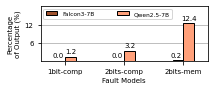

In [ ]:
#figure7
data = pd.read_excel('data/meaningless-foundationmodel.xlsx')

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(3,1))

data.columns=['model', 'Falcon3-7B', 'Qwen2.5-7B']

bar_width = 0.18
num_bars = 2  
group_width = bar_width * num_bars                  
group_centers = np.arange(len(data))

# Calculate position of each bar to center them
r1 = group_centers - group_width/2 + bar_width/2  # First bar
r2 = [x + bar_width for x in r1]



bar1 = plt.bar(r1, data['Falcon3-7B'], width=bar_width, edgecolor='black', linewidth=1, color='sienna', zorder=5)  # Yellow
bar2 = plt.bar(r2, data['Qwen2.5-7B'], width=bar_width, edgecolor='black', linewidth=1, color='lightsalmon', zorder=5)  # Yellow

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2. - 0.03, height + 0.8,
                 f'{height:.1f}', ha='center', va='bottom', fontsize=7)

def add_labels1(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.8,
                 f'{height:.1f}', ha='center', va='bottom', fontsize=7)
        
add_labels(bar1)
add_labels1(bar2)


plt.xlabel('Fault Models', labelpad=3)
plt.xticks(range(len(data)), data.model, ha='center')
plt.ylabel('Percentage\nof Output (%)')
plt.yticks([6, 12])
plt.ylim(0, 18)


plt.legend(data.columns[1:], loc='lower left', bbox_to_anchor=(0, 0.72, 0.8, 0.2), mode='expand', fontsize='small', ncol=2)
plt.gca().margins(x=0.1)

plt.grid(True,axis='y')
plt.savefig('figs/meaningless-foundationmodel.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

## avarage task

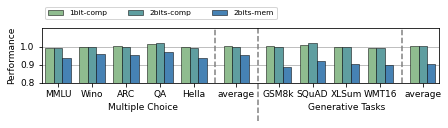

In [49]:
#figure8
data = pd.read_excel('data/average-task.xlsx')
data = data.iloc[:,1:]
data = data.rename(columns={'Unnamed: 1': 'Models'})

plt.rcParams.update({'font.size': 9})
plt.figure(figsize=(6.5,1))

total_bars = len(data)
bar_width = 0.1
positions = []
current_pos = 0

for i in range(len(data)):
    for j in range(3):
        positions.append(current_pos + j * bar_width)
    
    if i < len(data) - 1:  
        if i == 4 or i ==5 or i ==9:  
            current_pos += 5 * bar_width
        else: 
            current_pos += 4 * bar_width
positions = np.array(positions).reshape(len(data), 3)
# Create bars with different colors
# plt.bar(r1, data['w/o protection'], width=bar_width, label='FI', color='#474762', hatch = 'o*-+', zorder=5)  # Green
# # plt.bar(r2, data['ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
# plt.bar(r2, data['Ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
# plt.bar(r3, data['MaxiMals'], width=bar_width, label='global cli', color='#953738', hatch = '*',zorder=5)  # Red
# plt.bar(r4, data['Global Clipper'], width=bar_width, label='maximal', color='#345F71',  hatch='\/', zorder=5)  # Yellow
# plt.bar(r5, data['DRY'], width=bar_width, label='pretrain', color='#FFC474', hatch='/', zorder=5)  # Red
# # plt.bar(r6, data['ours'], width=bar_width, label='ours', color='#8B522F', hatch='/\\/\\', zorder=5)  # Yellow
# plt.bar(r6, data['ZERO-DRY'], width=bar_width, label='ours', color='#8B522F', hatch='o', zorder=5)  # Yellow
# plt.bar(positions[:, 0], data['w/o protection'], width=bar_width, label='FI', edgecolor='#493131', linewidth=0.5, color='whitesmoke', hatch = '/', zorder=5)  # Green
# plt.bar(positions[:, 1], data['Ranger'], width=bar_width, label='ranger', edgecolor='#493131', linewidth=0.5, color='darkorange', hatch = '\\\\', zorder=5)  # Blue
# plt.bar(positions[:, 2], data['MaxiMals'], width=bar_width, label='global cli', edgecolor='#493131', linewidth=0.5, color='lightsalmon', hatch = '+',zorder=5)  # Red
# plt.bar(positions[:, 3], data['Global Clipper'], width=bar_width, label='maximal', edgecolor='#493131', linewidth=0.5, color='peachpuff', hatch = 'x', zorder=5)  # Yellow
# plt.bar(positions[:, 4], data['ZERO-DRY + offline profiling'], width=bar_width, label='pretrain', edgecolor='#493131', linewidth=0.5, color='#6cb3da', hatch = '.', zorder=5)  # Red
# plt.bar(positions[:, 5], data['ZERO-DRY'],width=bar_width, label='ours', edgecolor='#493131', linewidth=0.5, color='#3b5da3', zorder=5)  # Yellow
plt.bar(positions[:, 0], data['1bit-comp'], width=bar_width, label='2bits-weights', edgecolor='black', linewidth=0.5, color='darkseagreen',  zorder=5)  # Red
plt.bar(positions[:, 1], data['2bits-comp'], width=bar_width, label='2bits-neurons', edgecolor='black', linewidth=0.5, color='cadetblue', zorder=5)  # Blue
plt.bar(positions[:, 2], data['2bits-mem'], width=bar_width, label='1bit-neurons', edgecolor='black', linewidth=0.5, color='steelblue', zorder=5)
#plt.bar(positions[:, 2], data['GSM8K'], width=bar_width, label='global cli', edgecolor='black', linewidth=0.5, color='#f5f8fa',  zorder=5)  # Red
# 'whitesmoke', 'darkorange', 'lightsalmon', 'peachpuff', '#6cb3da', '#3b5da3'
# labels = ['squad_v2', 'xtreme', 'gsm8k']
# positions = [2, 5, 8] 
# plt.xticks(positions, labels)
group_centers = positions.mean(axis=1)
plt.subplots_adjust(left=0.05, right=0.9)
# plt.legend(data.columns[1:], loc='upper right', fontsize='small', ncol=2)
# plt.xlabel('Models')
plt.ylabel('Performance')
plt.yticks([0.8, 0.9, 1])
plt.ylim(0.8, 1.1)
plt.text(group_centers[3]-0.2, 0.65, 'Multiple Choice', ha='center')  
plt.text(group_centers[8], 0.65, 'Generative Tasks', ha='center')

labels = data.Models.to_list()
labels_wrapped = ['\n'.join(label.split(' ')[:3]) for label in labels]
plt.xticks(group_centers, labels_wrapped)
# plt.xticks(range(len(data.Models)), data.Models, rotation=45, ha='center')
# plt.legend(data.columns[1:], bbox_to_anchor=(1, 1), fontsize='small', ncol=1)
plt.legend(data.columns[1:], loc='lower left', bbox_to_anchor=(0, 1.1, 0.6, 0.2), mode='expand', fontsize='small', ncol=3)
shift = -0.245
target_idx1 = group_centers[5]
target_idx2 = group_centers[6]
target_idx3 = group_centers[10]
plt.gca().margins(x=0.01)
plt.axvline(x=target_idx1 + shift, color='gray', linestyle='--', ymin=0, ymax=1, clip_on=False)
plt.axvline(x=target_idx2 + shift, color='gray', linestyle='--', ymin=-0.7, ymax=1, clip_on=False)
plt.axvline(x=target_idx3 + shift, color='gray', linestyle='--', ymin=0, ymax=1, clip_on=False)
plt.grid(True,axis='y')
plt.savefig('figs/average-task.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

## moe 

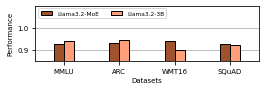

In [ ]:
#figure11
data = pd.read_excel('data/moe.xlsx')

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(4,1))

data.columns=['model', 'Llama3.2-MoE', 'Llama3.2-3B']

bar_width = 0.18
num_bars = 2  
group_width = bar_width * num_bars  
group_centers = np.arange(len(data))

# Calculate position of each bar to center them
r1 = group_centers - group_width/2 + bar_width/2  # First bar   
r2 = [x + bar_width for x in r1]



plt.bar(r1, data['Llama3.2-MoE'], width=bar_width, edgecolor='black', linewidth=1, color='sienna', zorder=5)  # Yellow
plt.bar(r2, data['Llama3.2-3B'], width=bar_width, edgecolor='black', linewidth=1, color='lightsalmon', zorder=5)  # Yellow


plt.xlabel('Datasets', labelpad=3)
plt.xticks(range(len(data)), data.model, ha='center')
plt.ylabel('Performance')
plt.yticks([0.8, 0.9, 1])
plt.ylim(0.85, 1.1)


plt.legend(data.columns[1:], loc='lower left', bbox_to_anchor=(0, 0.73, 0.6, 0.2), mode='expand', fontsize='small', ncol=2)
plt.gca().margins(x=0.1)

plt.grid(True,axis='y')
plt.savefig('figs/moe.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

## gate layer 

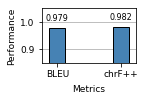

In [46]:
#figure12
data = pd.read_excel('data/gate-layer.xlsx')
data.columns=['a', 'b']

plt.rcParams.update({'font.size': 9})
plt.figure(figsize=(1.7, 1))

bar_width = 0.25
r1 = np.arange(len(data))

bar1 = plt.bar(r1, data.b, width=bar_width, edgecolor='black', linewidth=1, color='#4682B4', zorder=5)  # Yellow

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                 f'{height:.3f}', ha='center', va='bottom', fontsize=8)
        
add_labels(bar1)

plt.xlabel('Metrics', labelpad=6)
# labels = data.methods.to_list()
# labels_wrapped = ['_\n'.join(label.split('_')) for label in labels]
# plt.xticks(range(len(labels)), labels_wrapped, ha='center')
plt.xticks(range(len(data)), data.a, ha='center')
plt.yticks([0.8, 0.9, 1])
plt.ylim(0.85, 1.05)
plt.gca().margins(x=0.1)
plt.ylabel('Performance')
plt.grid(True,axis='y')
plt.savefig('figs/gate-layer.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

## model size 

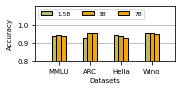

In [ ]:
#figure13
data = pd.read_excel('data/modelsize.xlsx')

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(2.5,1))

data.columns=['model', '1.5B', '3B', '7B']

bar_width = 0.15
num_bars = 3  
group_width = bar_width * num_bars  
group_centers = np.arange(len(data))

# Calculate position of each bar to center them
r1 = group_centers - group_width/2 + bar_width/2  # First bar       
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, data['1.5B'], width=bar_width, edgecolor='black', linewidth=1, color='darkkhaki', zorder=5)  # Yellow
plt.bar(r2, data['3B'], width=bar_width, edgecolor='black', linewidth=1, color='goldenrod', zorder=5)  # Yellow
plt.bar(r3, data['7B'], width=bar_width, edgecolor='black', linewidth=1, color='orange', zorder=5)  # Yellow

plt.xlabel('Datasets', labelpad=3)
plt.xticks(range(len(data)), data.model, ha='center')
plt.ylabel('Accuracy')
plt.yticks([0.8, 0.9, 1])
plt.ylim(0.8, 1.1)


plt.legend(data.columns[1:], loc='lower left', bbox_to_anchor=(0, 0.72, 0.8, 0.2), mode='expand', fontsize='small', ncol=3)
plt.gca().margins(x=0.15)

plt.grid(True,axis='y')
plt.savefig('figs/modelsize.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

## quantize 

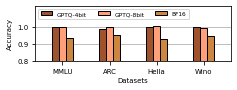

In [ ]:
#figure14
data = pd.read_excel('data/quantize.xlsx')

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(3.5,1))

data.columns=['model', 'GPTQ-4bit', 'GPTQ-8bit', 'BF16']

bar_width = 0.15
num_bars = 3  
group_width = bar_width * num_bars  
group_centers = np.arange(len(data))

# Calculate position of each bar to center them
r1 = group_centers - group_width/2 + bar_width/2  # First bar
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, data['GPTQ-4bit'], width=bar_width, edgecolor='black', linewidth=1, color='sienna', zorder=5)  # Yellow
plt.bar(r2, data['GPTQ-8bit'], width=bar_width, edgecolor='black', linewidth=1, color='lightsalmon', zorder=5)  # Yellow
plt.bar(r3, data['BF16'], width=bar_width, edgecolor='black', linewidth=1, color='peru', zorder=5)  # Yellow

plt.xlabel('Datasets', labelpad=3)
plt.xticks(range(len(data)), data.model, ha='center')
plt.ylabel('Accuracy')
plt.yticks([0.8, 0.9, 1])
plt.ylim(0.8, 1.12)


plt.legend(data.columns[1:], loc='lower left', bbox_to_anchor=(0, 0.72, 0.8, 0.2), mode='expand', fontsize='small', ncol=3)
plt.gca().margins(x=0.1)

plt.grid(True,axis='y')
plt.savefig('figs/quantize.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

## beam 

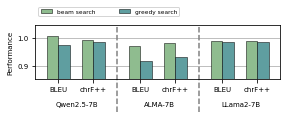

In [43]:
#figure15 a
data = pd.read_excel('data/beamwmt.xlsx')
data = data.iloc[:,1:]
data = data.rename(columns={'Unnamed: 1': 'Models'})

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(4,1))

total_bars = len(data)
bar_width = 0.1
positions = []
current_pos = 0

for i in range(len(data)):
    for j in range(2):
        positions.append(current_pos + j * bar_width)
    
    if i < len(data) - 1:  
        if i == 1 or i ==3:  
            current_pos += 4 * bar_width
        else: 
            current_pos += 3 * bar_width
positions = np.array(positions).reshape(len(data), 2)
# Create bars with different colors
# plt.bar(r1, data['w/o protection'], width=bar_width, label='FI', color='#474762', hatch = 'o*-+', zorder=5)  # Green
# # plt.bar(r2, data['ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
# plt.bar(r2, data['Ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
# plt.bar(r3, data['MaxiMals'], width=bar_width, label='global cli', color='#953738', hatch = '*',zorder=5)  # Red
# plt.bar(r4, data['Global Clipper'], width=bar_width, label='maximal', color='#345F71',  hatch='\/', zorder=5)  # Yellow
# plt.bar(r5, data['DRY'], width=bar_width, label='pretrain', color='#FFC474', hatch='/', zorder=5)  # Red
# # plt.bar(r6, data['ours'], width=bar_width, label='ours', color='#8B522F', hatch='/\\/\\', zorder=5)  # Yellow
# plt.bar(r6, data['ZERO-DRY'], width=bar_width, label='ours', color='#8B522F', hatch='o', zorder=5)  # Yellow
# plt.bar(positions[:, 0], data['w/o protection'], width=bar_width, label='FI', edgecolor='#493131', linewidth=0.5, color='whitesmoke', hatch = '/', zorder=5)  # Green
# plt.bar(positions[:, 1], data['Ranger'], width=bar_width, label='ranger', edgecolor='#493131', linewidth=0.5, color='darkorange', hatch = '\\\\', zorder=5)  # Blue
# plt.bar(positions[:, 2], data['MaxiMals'], width=bar_width, label='global cli', edgecolor='#493131', linewidth=0.5, color='lightsalmon', hatch = '+',zorder=5)  # Red
# plt.bar(positions[:, 3], data['Global Clipper'], width=bar_width, label='maximal', edgecolor='#493131', linewidth=0.5, color='peachpuff', hatch = 'x', zorder=5)  # Yellow
# plt.bar(positions[:, 4], data['ZERO-DRY + offline profiling'], width=bar_width, label='pretrain', edgecolor='#493131', linewidth=0.5, color='#6cb3da', hatch = '.', zorder=5)  # Red
# plt.bar(positions[:, 5], data['ZERO-DRY'],width=bar_width, label='ours', edgecolor='#493131', linewidth=0.5, color='#3b5da3', zorder=5)  # Yellow
plt.bar(positions[:, 0], data['beam search'], width=bar_width, label='2bits-weights', edgecolor='black', linewidth=0.5, color='darkseagreen',  zorder=5)  # Red
plt.bar(positions[:, 1], data['greedy search'], width=bar_width, label='2bits-neurons', edgecolor='black', linewidth=0.5, color='cadetblue', zorder=5)  # Blue
#plt.bar(positions[:, 2], data['GSM8K'], width=bar_width, label='global cli', edgecolor='black', linewidth=0.5, color='#f5f8fa',  zorder=5)  # Red
# 'whitesmoke', 'darkorange', 'lightsalmon', 'peachpuff', '#6cb3da', '#3b5da3'
# labels = ['squad_v2', 'xtreme', 'gsm8k']
# positions = [2, 5, 8] 
# plt.xticks(positions, labels)
group_centers = positions.mean(axis=1)
plt.subplots_adjust(left=0.05, right=0.9)
# plt.legend(data.columns[1:], loc='upper right', fontsize='small', ncol=2)
# plt.xlabel('Models')
plt.ylabel('Performance')
plt.yticks([0.8, 0.9, 1])
plt.ylim(0.85, 1.05)
plt.text(group_centers[1]-0.14, 0.75, 'Qwen2.5-7B', ha='center')  
plt.text(group_centers[3]-0.14, 0.75, 'ALMA-7B', ha='center')
plt.text(group_centers[5]-0.14, 0.75, 'LLama2-7B', ha='center')
labels = data.Models.to_list()
labels_wrapped = ['\n'.join(label.split(' ')[:3]) for label in labels]
plt.xticks(group_centers, labels_wrapped)
# plt.xticks(range(len(data.Models)), data.Models, rotation=45, ha='center')
# plt.legend(data.columns[1:], bbox_to_anchor=(1, 1), fontsize='small', ncol=1)
plt.legend(data.columns[1:], loc='lower left', bbox_to_anchor=(0, 1.1, 0.6, 0.2), mode='expand', fontsize='small', ncol=2)
shift = -0.2
target_idx1 = group_centers[2]
target_idx2 = group_centers[4]
plt.gca().margins(x=0.05)
plt.axvline(x=target_idx1 + shift, color='gray', linestyle='--', ymin=-0.6, ymax=1, clip_on=False)
plt.axvline(x=target_idx2 + shift, color='gray', linestyle='--', ymin=-0.6, ymax=1, clip_on=False)
plt.grid(True,axis='y')
plt.savefig('figs/beamwmt.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

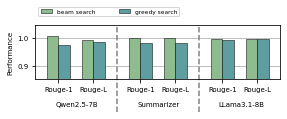

In [44]:
#figure15 b
data = pd.read_excel('data/beamxlsum.xlsx')
data = data.iloc[:,1:]
data = data.rename(columns={'Unnamed: 1': 'Models'})

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(4,1))

total_bars = len(data)
bar_width = 0.1
positions = []
current_pos = 0

for i in range(len(data)):
    for j in range(2):
        positions.append(current_pos + j * bar_width)
    
    if i < len(data) - 1:  
        if i == 1 or i ==3:  
            current_pos += 4 * bar_width
        else: 
            current_pos += 3 * bar_width
positions = np.array(positions).reshape(len(data), 2)
# Create bars with different colors
# plt.bar(r1, data['w/o protection'], width=bar_width, label='FI', color='#474762', hatch = 'o*-+', zorder=5)  # Green
# # plt.bar(r2, data['ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
# plt.bar(r2, data['Ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
# plt.bar(r3, data['MaxiMals'], width=bar_width, label='global cli', color='#953738', hatch = '*',zorder=5)  # Red
# plt.bar(r4, data['Global Clipper'], width=bar_width, label='maximal', color='#345F71',  hatch='\/', zorder=5)  # Yellow
# plt.bar(r5, data['DRY'], width=bar_width, label='pretrain', color='#FFC474', hatch='/', zorder=5)  # Red
# # plt.bar(r6, data['ours'], width=bar_width, label='ours', color='#8B522F', hatch='/\\/\\', zorder=5)  # Yellow
# plt.bar(r6, data['ZERO-DRY'], width=bar_width, label='ours', color='#8B522F', hatch='o', zorder=5)  # Yellow
# plt.bar(positions[:, 0], data['w/o protection'], width=bar_width, label='FI', edgecolor='#493131', linewidth=0.5, color='whitesmoke', hatch = '/', zorder=5)  # Green
# plt.bar(positions[:, 1], data['Ranger'], width=bar_width, label='ranger', edgecolor='#493131', linewidth=0.5, color='darkorange', hatch = '\\\\', zorder=5)  # Blue
# plt.bar(positions[:, 2], data['MaxiMals'], width=bar_width, label='global cli', edgecolor='#493131', linewidth=0.5, color='lightsalmon', hatch = '+',zorder=5)  # Red
# plt.bar(positions[:, 3], data['Global Clipper'], width=bar_width, label='maximal', edgecolor='#493131', linewidth=0.5, color='peachpuff', hatch = 'x', zorder=5)  # Yellow
# plt.bar(positions[:, 4], data['ZERO-DRY + offline profiling'], width=bar_width, label='pretrain', edgecolor='#493131', linewidth=0.5, color='#6cb3da', hatch = '.', zorder=5)  # Red
# plt.bar(positions[:, 5], data['ZERO-DRY'],width=bar_width, label='ours', edgecolor='#493131', linewidth=0.5, color='#3b5da3', zorder=5)  # Yellow
plt.bar(positions[:, 0], data['beam search'], width=bar_width, label='2bits-weights', edgecolor='black', linewidth=0.5, color='darkseagreen',  zorder=5)  # Red
plt.bar(positions[:, 1], data['greedy search'], width=bar_width, label='2bits-neurons', edgecolor='black', linewidth=0.5, color='cadetblue', zorder=5)  # Blue
#plt.bar(positions[:, 2], data['GSM8K'], width=bar_width, label='global cli', edgecolor='black', linewidth=0.5, color='#f5f8fa',  zorder=5)  # Red
# 'whitesmoke', 'darkorange', 'lightsalmon', 'peachpuff', '#6cb3da', '#3b5da3'
# labels = ['squad_v2', 'xtreme', 'gsm8k']
# positions = [2, 5, 8] 
# plt.xticks(positions, labels)
group_centers = positions.mean(axis=1)
plt.subplots_adjust(left=0.05, right=0.9)
# plt.legend(data.columns[1:], loc='upper right', fontsize='small', ncol=2)
# plt.xlabel('Models')
plt.ylabel('Performance')
plt.yticks([0.8, 0.9, 1])
plt.ylim(0.85, 1.05)
plt.text(group_centers[1]-0.14, 0.75, 'Qwen2.5-7B', ha='center')  
plt.text(group_centers[3]-0.14, 0.75, 'Summarizer', ha='center')
plt.text(group_centers[5]-0.14, 0.75, 'LLama3.1-8B', ha='center')
labels = data.Models.to_list()
labels_wrapped = ['\n'.join(label.split(' ')[:3]) for label in labels]
plt.xticks(group_centers, labels_wrapped)
# plt.xticks(range(len(data.Models)), data.Models, rotation=45, ha='center')
# plt.legend(data.columns[1:], bbox_to_anchor=(1, 1), fontsize='small', ncol=1)
plt.legend(data.columns[1:], loc='lower left', bbox_to_anchor=(0, 1.1, 0.6, 0.2), mode='expand', fontsize='small', ncol=2)
shift = -0.2
target_idx1 = group_centers[2]
target_idx2 = group_centers[4]
plt.gca().margins(x=0.05)
plt.axvline(x=target_idx1 + shift, color='gray', linestyle='--', ymin=-0.6, ymax=1, clip_on=False)
plt.axvline(x=target_idx2 + shift, color='gray', linestyle='--', ymin=-0.6, ymax=1, clip_on=False)
plt.grid(True,axis='y')
plt.savefig('figs/beamxlsum.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

## cot 

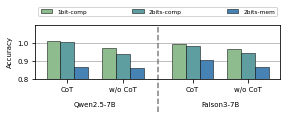

In [48]:
#figure16
data = pd.read_excel('data/cot.xlsx')
data = data.iloc[:,1:]
data = data.rename(columns={'Unnamed: 1': 'Models'})

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(4,1))

total_bars = len(data)
bar_width = 0.1
positions = []
current_pos = 0

for i in range(len(data)):
    for j in range(3):
        positions.append(current_pos + j * bar_width)
    
    if i < len(data) - 1:  
        if i == 1:  
            current_pos += 5 * bar_width
        else: 
            current_pos += 4 * bar_width
positions = np.array(positions).reshape(len(data), 3)
# Create bars with different colors
# plt.bar(r1, data['w/o protection'], width=bar_width, label='FI', color='#474762', hatch = 'o*-+', zorder=5)  # Green
# # plt.bar(r2, data['ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
# plt.bar(r2, data['Ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
# plt.bar(r3, data['MaxiMals'], width=bar_width, label='global cli', color='#953738', hatch = '*',zorder=5)  # Red
# plt.bar(r4, data['Global Clipper'], width=bar_width, label='maximal', color='#345F71',  hatch='\/', zorder=5)  # Yellow
# plt.bar(r5, data['DRY'], width=bar_width, label='pretrain', color='#FFC474', hatch='/', zorder=5)  # Red
# # plt.bar(r6, data['ours'], width=bar_width, label='ours', color='#8B522F', hatch='/\\/\\', zorder=5)  # Yellow
# plt.bar(r6, data['ZERO-DRY'], width=bar_width, label='ours', color='#8B522F', hatch='o', zorder=5)  # Yellow
# plt.bar(positions[:, 0], data['w/o protection'], width=bar_width, label='FI', edgecolor='#493131', linewidth=0.5, color='whitesmoke', hatch = '/', zorder=5)  # Green
# plt.bar(positions[:, 1], data['Ranger'], width=bar_width, label='ranger', edgecolor='#493131', linewidth=0.5, color='darkorange', hatch = '\\\\', zorder=5)  # Blue
# plt.bar(positions[:, 2], data['MaxiMals'], width=bar_width, label='global cli', edgecolor='#493131', linewidth=0.5, color='lightsalmon', hatch = '+',zorder=5)  # Red
# plt.bar(positions[:, 3], data['Global Clipper'], width=bar_width, label='maximal', edgecolor='#493131', linewidth=0.5, color='peachpuff', hatch = 'x', zorder=5)  # Yellow
# plt.bar(positions[:, 4], data['ZERO-DRY + offline profiling'], width=bar_width, label='pretrain', edgecolor='#493131', linewidth=0.5, color='#6cb3da', hatch = '.', zorder=5)  # Red
# plt.bar(positions[:, 5], data['ZERO-DRY'],width=bar_width, label='ours', edgecolor='#493131', linewidth=0.5, color='#3b5da3', zorder=5)  # Yellow
plt.bar(positions[:, 0], data['1bit-comp'], width=bar_width, label='2bits-weights', edgecolor='black', linewidth=0.5, color='darkseagreen',  zorder=5)  # Red
plt.bar(positions[:, 1], data['2bits-comp'], width=bar_width, label='2bits-neurons', edgecolor='black', linewidth=0.5, color='cadetblue', zorder=5)  # Blue
plt.bar(positions[:, 2], data['2bits-mem'], width=bar_width, label='1bit-neurons', edgecolor='black', linewidth=0.5, color='steelblue', zorder=5)
#plt.bar(positions[:, 2], data['GSM8K'], width=bar_width, label='global cli', edgecolor='black', linewidth=0.5, color='#f5f8fa',  zorder=5)  # Red
# 'whitesmoke', 'darkorange', 'lightsalmon', 'peachpuff', '#6cb3da', '#3b5da3'
# labels = ['squad_v2', 'xtreme', 'gsm8k']
# positions = [2, 5, 8] 
# plt.xticks(positions, labels)
group_centers = positions.mean(axis=1)
plt.subplots_adjust(left=0.05, right=0.9)
# plt.legend(data.columns[1:], loc='upper right', fontsize='small', ncol=2)
# plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.yticks([0.8, 0.9, 1])
plt.ylim(0.8, 1.1)
plt.text(group_centers[1]-0.2, 0.65, 'Qwen2.5-7B', ha='center')  
plt.text(group_centers[3]-0.2, 0.65, 'Falson3-7B', ha='center')
labels = data.Models.to_list()
plt.xticks(group_centers, labels)
# plt.xticks(range(len(data.Models)), data.Models, rotation=45, ha='center')
# plt.legend(data.columns[1:], bbox_to_anchor=(1, 1), fontsize='small', ncol=1)
plt.legend(data.columns[1:], loc='lower left', bbox_to_anchor=(0, 1.1, 1, 0.2), mode='expand', fontsize='small', ncol=3)
shift = -0.25
target_idx1 = group_centers[2]
plt.gca().margins(x=0.05)
plt.axvline(x=target_idx1 + shift, color='gray', linestyle='--', ymin=-0.6, ymax=1, clip_on=False)
plt.grid(True,axis='y')
plt.savefig('figs/cot.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

## datatype

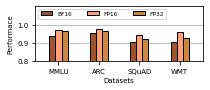

In [ ]:
#figure17
data = pd.read_excel('data/datatype.xlsx')

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(3,1))

data.columns=['model', 'BF16', 'FP16', 'FP32']

bar_width = 0.15
num_bars = 3  
group_width = bar_width * num_bars  
group_centers = np.arange(len(data))

# Calculate position of each bar to center them
r1 = group_centers - group_width/2 + bar_width/2  # First bar   
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]


plt.bar(r1, data['BF16'], width=bar_width, edgecolor='black', linewidth=1, color='sienna', zorder=5)  # Yellow
plt.bar(r2, data['FP16'], width=bar_width, edgecolor='black', linewidth=1, color='lightsalmon', zorder=5)  # Yellow
plt.bar(r3, data['FP32'], width=bar_width, edgecolor='black', linewidth=1, color='peru', zorder=5)  # Yellow

plt.xlabel('Datasets', labelpad=3)
plt.xticks(range(len(data)), data.model, ha='center')
plt.ylabel('Performace')
plt.yticks([0.8, 0.9, 1])
plt.ylim(0.8, 1.1)


plt.legend(data.columns[1:], loc='lower left', bbox_to_anchor=(0, 0.72, 0.8, 0.2), mode='expand', fontsize='small', ncol=3)
plt.gca().margins(x=0.1)

plt.grid(True,axis='y')
plt.savefig('figs/datatype.pdf',dpi=100,bbox_inches = 'tight')

plt.show()